In [1]:
from fastai.vision.all import *

In [2]:
time = torch.arange(20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

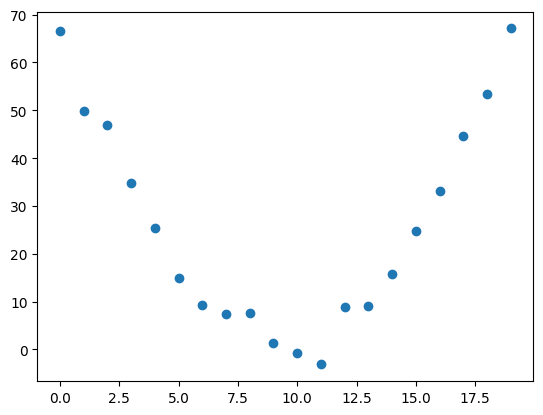

In [4]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1
plt.scatter(time, speed)

In [5]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + b*t + c

In [6]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

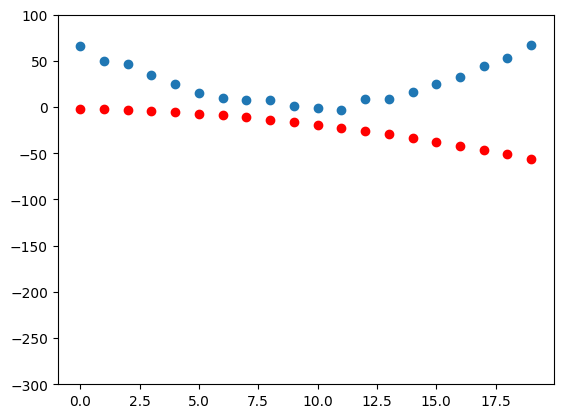

In [11]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time, params)
show_preds(preds)

In [12]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [13]:
loss = mse(preds, speed)
loss

tensor(3197.4556, grad_fn=<MeanBackward0>)

In [15]:
params

tensor([-0.1273, -0.4594, -1.7586], requires_grad=True)

In [16]:
params.data

tensor([-0.1273, -0.4594, -1.7586])

In [19]:
loss.backward()
params.grad.data

tensor([-16902.8984,  -1096.5173,    -95.3517])

In [21]:
lr = 1e-5
params.data -= params.grad.data*lr
params.grad = None
params.data

tensor([ 0.0418, -0.4485, -1.7576])

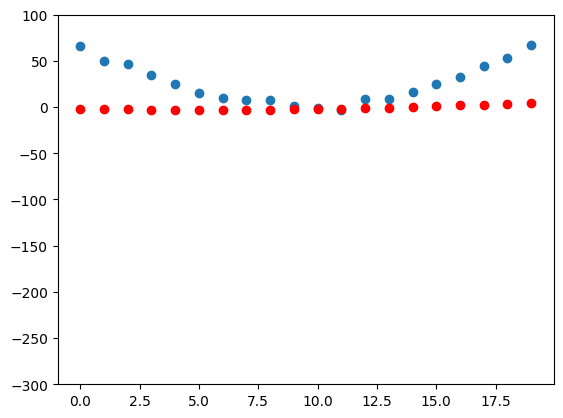

In [22]:
preds = f(time,params)
show_preds(preds)

In [24]:
loss = mse(preds, speed)
loss

tensor(1138.7981, grad_fn=<MeanBackward0>)

In [27]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [28]:
for i in range(10): apply_step(params)

1138.798095703125
749.2324829101562
675.5099487304688
661.5548095703125
658.9093017578125
658.4039306640625
658.3036499023438
658.2799682617188
658.2706298828125
658.2643432617188


In [29]:
for i in range(20): apply_step(params)

658.2583618164062
658.2525024414062
658.2467041015625
658.2409057617188
658.2350463867188
658.2293090820312
658.2234497070312
658.2176513671875
658.2118530273438
658.2059936523438
658.2001953125
658.1944580078125
658.1885986328125
658.1828002929688
658.177001953125
658.1712036132812
658.1654663085938
658.1596069335938
658.1538696289062
658.1480712890625


12753.0361328125
2910.649169921875
1048.16552734375
695.723388671875


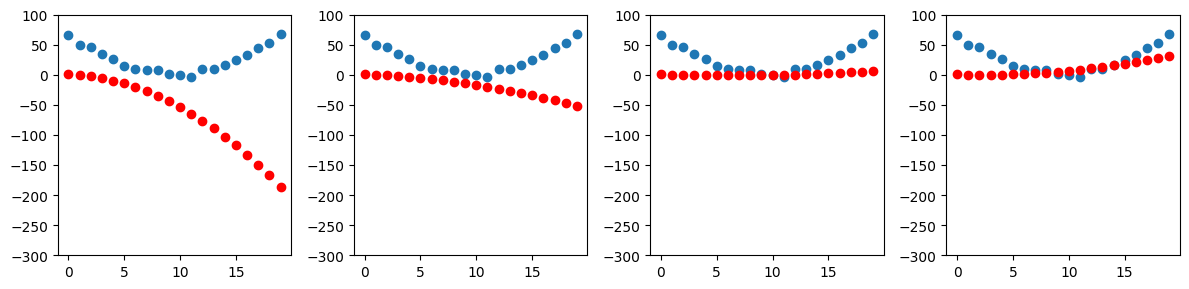

In [37]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, True), ax)
plt.tight_layout()

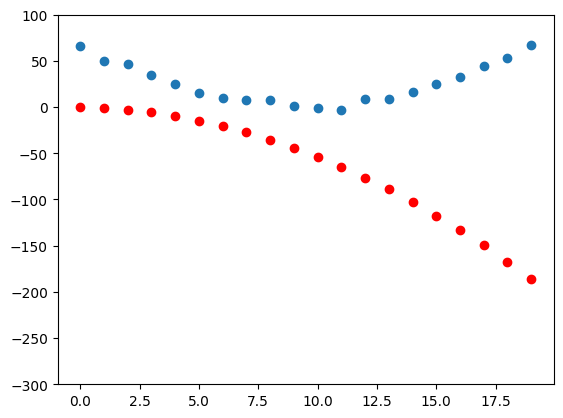

In [36]:
params = torch.randn(3).requires_grad_()
preds = f(time, params)
show_preds(preds)